<a href="https://colab.research.google.com/github/adilsonvj/SME0130---Redes-Complexas-/blob/main/Redes_Complexas_Question%C3%A1rio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://web.icmc.usp.br/SCAPINST/identidade_visual/logomarca/LOGO%20ICMC%20RGB.png" height="200"/>
</div>

# Questionário: – Modelos sem Escala

**Disciplina**: Redes Complexas SME0130 / 1º Semestre 2021
**Professor**: Francisco Rodrigues
**Aluno**: Adilson Vital Junior
**Número** USP: 9278160

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math

def shannon_entropy(P_k_list):
  """
    Inputs:
      - P_k_list: List of probabilities of each degree to be selected
    Outputs:
      - H: Shannon Entropy
  """
  H = 0
  for p in P_k_list:
      if(p > 0):
          H = H - p*math.log(p, 2)
  return H

def get_degree_distribution(G):
  """
    Inputs:
      - G: Graph to get the degree distribution
    Outputs:
      - k_arr: Array of degrees
      - P_k_arr: Array with the Probabilities to select a random degree
  """
  degree_list = list(dict(G.degree()).values())
  degree_frequency = Counter(degree_list)
  k_arr = np.array(list(degree_frequency.keys()))
  P_k = np.array(list(degree_frequency.values()))
  P_k_arr = P_k / sum(P_k)
  return k_arr, P_k_arr

def momment_of_degree_distribution(G,m):
    k,Pk = get_degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def momment_of_degree_distribution2(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

### **1. Calcule a média do coeficiente de aglomeração e o segundo momento do grau para uma rede BA com grau médio igual a 10 e N = 1000.**



In [25]:
N = 1000
av_degree = 10
for i in range(10):
  m = int(av_degree/2)
  G = nx.barabasi_albert_graph(N, m)
  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G = G.subgraph(Gcc[0])
  avg_c = np.mean(list(nx.clustering(G).values()))
  smmd_1 = momment_of_degree_distribution(G, 2)
  print("Simulação",i+1,"<cc> %.3f"%avg_c, "<k2> %.f"%smmd_1)

Simulação 1 <cc> 0.033 <k2> 192
Simulação 2 <cc> 0.037 <k2> 203
Simulação 3 <cc> 0.041 <k2> 204
Simulação 4 <cc> 0.037 <k2> 203
Simulação 5 <cc> 0.037 <k2> 198
Simulação 6 <cc> 0.038 <k2> 198
Simulação 7 <cc> 0.040 <k2> 199
Simulação 8 <cc> 0.036 <k2> 202
Simulação 9 <cc> 0.041 <k2> 204
Simulação 10 <cc> 0.044 <k2> 214


### **2. Considere uma rede aleatória (Erdos-Renyi) e uma rede BA com N = 1000 vértices e grau médio 10. Qual o valor da entropia de Shannon da distribuição do grau para essas redes?**

In [3]:
N = 1000
av_degree = 10

p_er = av_degree/(N-1)
G_er = nx.erdos_renyi_graph(N, p_er)
k_arr_er, P_k_arr_er = get_degree_distribution(G_er)
H_er = shannon_entropy(P_k_arr_er)

m_ba = int(av_degree/2)
G_ba = nx.barabasi_albert_graph(N, m_ba)
k_arr_ba, P_k_arr_ba = get_degree_distribution(G_ba)
H_ba = shannon_entropy(P_k_arr_ba)

print("H(ER) %.1f"%H_er, "; H(BA) %.1f"%H_ba)

H(ER) 3.7 ; H(BA) 3.6


### **3. Considere o modelo de Barabási-Albert com N = 1000 e grau médio igual a 10. Calcule o coeficiente de correlação de Pearson (rho) entre o grau e a medida eigenvector centrality. O que esse valor indica?**

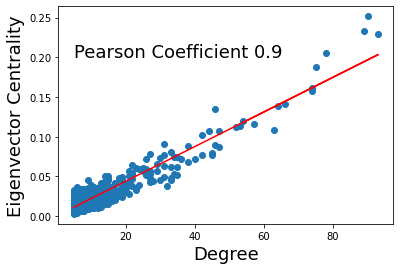

In [4]:
import pandas as pd
from scipy.stats import pearsonr

N = 1000
av_degree = 10

m_ba = int(av_degree/2)
G_ba = nx.barabasi_albert_graph(N, m_ba)

dict_degree = dict(nx.degree(G_ba))
dict_eigenvector_c = nx.eigenvector_centrality(G_ba)

df_degree = pd.DataFrame.from_dict(dict_degree, orient = "index", columns = ["degree"]).reset_index()
df_eigenvector_c = pd.DataFrame.from_dict(dict_eigenvector_c, orient = "index", columns = ["eigen"]).reset_index()

df = df_degree.merge(df_eigenvector_c, on = "index", how = "inner")

rho, _ = pearsonr(df.degree, df.eigen)

coef = np.polyfit(df.degree, df.eigen, 1)
poly1d_fn = np.poly1d(coef) 

plt.scatter(df.degree, df.eigen)
plt.plot(df.degree, poly1d_fn(df.degree), color = "red")
plt.xlabel("Degree", fontsize = 18)
plt.ylabel("Eigenvector Centrality", fontsize = 18)

plt.text(5, 0.2, "Pearson Coefficient %.1f"%rho, fontsize = 18)
plt.show()

### **4. Calcule a correlação entre a medida betweeness centrality e o grau para rede BA. Considere N = 500 e grau médio 10.**

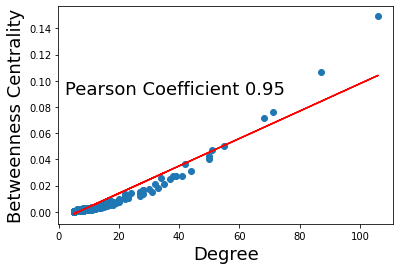

In [5]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr

N = 500
av_degree = 10

m_ba = int(av_degree/2)
G_ba = nx.barabasi_albert_graph(N, m_ba)

dict_degree = dict(nx.degree(G_ba))
dict_betweenness_c = nx.betweenness_centrality(G_ba)

df_degree = pd.DataFrame.from_dict(dict_degree, orient = "index", columns = ["degree"]).reset_index()
df_betweenness_c = pd.DataFrame.from_dict(dict_betweenness_c, orient = "index", columns = ["betweenness"]).reset_index()

df = df_degree.merge(df_betweenness_c, on = "index", how = "inner")

rho, _ = pearsonr(df.degree, df.betweenness)
corr, _ = spearmanr(df.degree, df.betweenness)

coef = np.polyfit(df.degree, df.betweenness, 1)
poly1d_fn = np.poly1d(coef) 

plt.scatter(df.degree, df.betweenness)
plt.plot(df.degree, poly1d_fn(df.degree), color = "red")
plt.xlabel("Degree", fontsize = 18)
plt.ylabel("Betweenness Centrality", fontsize = 18)
plt.text(2, 0.09, "Pearson Coefficient %.2f"%rho, fontsize = 18)
plt.show()

### **5. Calcule o segundo momento do grau para o modelo de configuração com a = 3 (coeficiente da lei de potência (Zipft)). Considere N = 500 e o valor mais próximo, pois os valores podem variar de uma simulação para outra.**

In [26]:
from random import *
np.random.seed(42)
N = 500
a = 3

for i in range(10):
  seq = np.random.zipf(a, N) 
  if(sum(seq)%2 != 0): 
      pos = randint(0, len(seq))
      seq[pos] = seq[pos]+ 1

  G=nx.configuration_model(seq)
  Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  G = G.subgraph(Gcc[0])
  smmd_1 = momment_of_degree_distribution(G, 2)
  print("Simulação",i+1,"Segundo momento <k2> %.1f"%smmd_1)

Simulação 1 Segundo momento <k2> 12.5
Simulação 2 Segundo momento <k2> 16.9
Simulação 3 Segundo momento <k2> 8.0
Simulação 4 Segundo momento <k2> 15.2
Simulação 5 Segundo momento <k2> 10.8
Simulação 6 Segundo momento <k2> 23.9
Simulação 7 Segundo momento <k2> 19.0
Simulação 8 Segundo momento <k2> 9.7
Simulação 9 Segundo momento <k2> 5.4
Simulação 10 Segundo momento <k2> 7.8
